# Workshop 2: Logistic Regression

## What you need to do before workshop 

Before you begin with the workshop exercises, it is important for you to complete all the activities of the second week of Module 3A to understand and apply your learning. 

#### Optional

Go to the course in Canvas and then resources folder on the left-side navigation to refresh your on basic Python and maths skills. You can also click on the link below to refersh Python skills. Use your RMIT id to log into linkedin learning.

Python skills: https://www.linkedin.com/learning-login/share?account=2104756&forceAccount=false&redirect=https%3A%2F%2Fwww.linkedin.com%2Flearning%2Fpython-essential-training-2018%3Ftrk%3Dshare_ent_url%26shareId%3DguTt2S8FS1mk6DyFcdj2sg%253D%253D

## Guide to use Jupyter Notebook


### What is Jupyter Notebook?

The Jupyter Notebook is a powerful tool for interactively developing and presenting programming exercises and assignments. 

A Jupyter Notebook consists of the code and its output into a single document. In a single document, you can combine visualisations, narrative text, mathematical equations, and codes to explain the exercise. You'll be able to run the code, display the output, and also add explanations, formulas, charts in a notebook and make the exercise more transparent, and understandable.


### What is .ipynb file?

Each .ipynb file is one Jupyter notebook and gets this .ipynb extension. If you create or download a new notebook, a new  .ipynb file will be created or downloaded. 


### Jupyter Notebook Interface

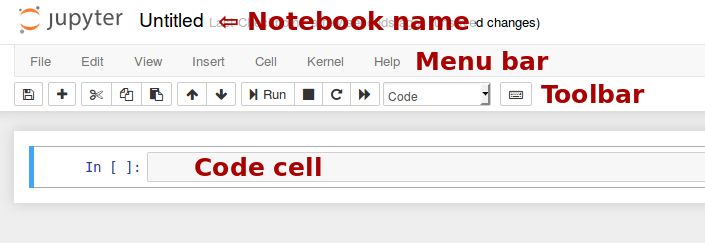



There are two fairly prominent terms that you should understand: cells and kernels. 

A kernel is a “computational engine” that executes the code contained in a notebook document.
A cell is a container for text to be displayed in the notebook or code to be executed by the notebook’s kernel.


### Cells

Cells form the body of a notebook. The notebook consists of a sequence of cells. For example, this notebook consists of many  cells. 

There are two main cell types that we will use in this module:

#### Code Cell

A code cell contains code to be executed in the kernel. When the code is run, the notebook displays the output below the code cell that generated it.

#### Markdown Cell

A Markdown cell contains text formatted using Markdown and displays its output in-place when the Markdown cell is run.
Every cell starts off being a code cell, but its type can be changed by using a drop-down on the toolbar (which will be “Code”, initially).
The markdown cell will not give you any output if you run it as it is not a code cell.

#### Run a cell
To run a code cell, click on 'run' button on the toolbar or click cell on the menu bar and select run cells.


You can name a Jupyter Notebook by clicking on 'untitled' on the top of the notebook as shown in the screenshot above. Click on 'save' on the toolbar to save your work. You can download your notebook by clicking on 'file' in the menubar and download it as a notebook with .ipynb extension. 

## Let's get started

This week you learned about the concept of machine learning and its types. You covered linear regression as a simple method of implementing supervised learning.You also explored how to generalise a model to avoid underfitting or overfitting. Let's apply linear regression using Python. 

In this exercise, you'll build and evaluate a linear regression based machine learning model and the following are the steps:
1. Import the libraries.
2. Load input data (.csv file).
3. Pre-process data.
4. Create functions to calculate mean, variance, co-variance and estimate co-efficients and root mean squared error. To implement a simple linear regression model and evaluate it, firstly, you need to find  mean  variance, co-variance and co-efficients that you learned from the weekly activities. To do this, the functions to calculate all these parameters need to be written in Python.
5. Create a functions to implement a linear regression model, evaluate and viusalise the model. After developing all the functions, you'll use these functions to implement linear regression model on 'insurance' dataset and then evalaute and visualise the model.
6. Implement linear regression model on 'insurance' dataset. 
7. Evaluate the linear regression model on 'insurance' dataset. 
8. Visualise the linear regression model on 'insurance' dataset.

Note that a function is written in Python to perform each step listed above and returns a value(s) that can be used by another function as an input(s). The assessments are also designed in similar fashion where you'll complete the coding of the functions and ensure that the results are correct.

## 1. Import the needed libraries

The first step is to import the following Python libraries. 

In [2]:
from random import seed
from random import randrange
from csv import reader
from math import exp
import functions

Import extra libraries to display the classification graph.

In [3]:
import numpy as np
import matplotlib.pyplot as plot
from numpy.lib.arraysetops import unique

## 2. Load data/dataset

Recall the steps to machine learning or supervised learning. Any machine learning algorithm needs input data to build a model. Thus,load a CSV file.

In [4]:
# Input: filename (string)
# Output: dataset (list) 

def load_csv(filename='pima-indians-diabetes.csv'):
    dataset = []
    with open(filename, 'r') as f:
        f = reader(f)
        for row in f:
            dataset.append(row)
    return dataset

## 3. Pre-process data
Let's pre-process the data. There are many sub-steps involved in this step.

### a. Convert string column to float
Currently, the rows in the dataset are in string format. So, we're converting the rows from string to float format. This will convert the string column into decimal number (float) and overwrite the data. Note that the function strip() will remove the white spaces from the data.

In [5]:
# Input: dataset (list), column(number)

def string_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

### b. Find the min and max values for each column

Defining a function that finds the minimum and maximum values for the first column of the dataset and returns both values.

In [6]:
# Input: dataset (list)
# Output: minmax (list) 

def dataset_minmax(dataset):
    minmax = []
    col_val = []
    for i in range(len(dataset[0])):
        for row in dataset:
            col_val.append(row[i])
        minmax.append([min(col_val), max(col_val)])
    return minmax

### c. Rescale dataset columns to the range 0-1

Defining a function that rescales the dataset columns to range 0 to 1 using minmax fuction defined above.

In [7]:
# Input: dataset (list), minmax(list)

def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

### d. Split a dataset into k folds

We studied k-fold in this week. Now let's apply it. A function is defined here to spilt the dataset into k folds.

In [8]:
# Input: dataset (list), n_folds(number)
# Output: dataset_split (list) 

def cross_validation_split(dataset, n_folds):
    split = []
    copy = list(dataset)

    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = []
        while len(fold) < fold_size:
            index = randrange(len(copy))
            fold.append(copy.pop(index))
        split.append(fold)
    return split

## 3. Calculate model's accuracy 

In this step we're defining a function to calculate the accuracy of the model. We'll use this function later in the exercise.

In [9]:
# Input: actual (list), predicted(list)
# Output: accuracy_result (float) 

def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if (actual[i] == predicted[i]):
            correct = correct + 1
    actual_result = correct / float(len(actual)) * 100.0
    return actual_result

## 4. Evaluate an algorithm using a cross validation split

Another important way to evaluate a logistic regression is to monitor cross validation spilt. This function will evaluate the algorithm's performanc on train and test set and using cross validation spilt function created above.

In [10]:
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)

    scores = list()

    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)

        train_set = sum(train_set, [])
        test_set = list()

        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None

        predicted = algorithm(train_set, test_set, *args)

        actual = [row[-1] for row in fold]

        accuracy = accuracy_metric(actual, predicted)

        scores.append(accuracy)

    return scores

## 5. Make a prediction with coefficients

This function predicts the outcome using coefficients.We'll use it to predict the outcome on a real-world dataset later in this exercise.

In [11]:
# Input: row (list), coefficients (list)
# Output: predict (float) 

def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row) - 1):
        yhat = yhat + coefficients[i+1] * row[i]
    return 1.0 / (1.0 + exp(-yhat))

## 6. Estimate logistic regression coefficients using stochastic gradient descent

We studied stochastic gradient descent in this week. Now let's apply it to optimise the algorithm. Here a function is defined that you'll use later in the exercise to optimise the model for prediction. 

### a. Coefficients using using stochastic gradient descent

Defining a function to calculate coefficients using stochastic gradient descent.

In [12]:
def coefficients_using_stochastic_gradient_descent(train, learning_rate, number_of_epochs):
    coefficient = list()

    for i in range(len(train[0])):
        coefficient.append(0.0)

    for _ in range(number_of_epochs):
        for row in train:
            yhat = predict(row, coefficient)

            error = row[-1] - yhat

            coefficient[0] = coefficient[0] + learning_rate * error * yhat * (1.0 - yhat)

            for i in range(len(row) - 1):
                coefficient[i + 1] = coefficient[i + 1] + learning_rate * error * yhat * (1.0 - yhat) * row[i]

    return coefficient

### b. Logistic Regression Algorithm With Stochastic Gradient Descent

Defining a function to implement logistic regression model using stochastic gradient descent functions defined above.

In [13]:
def logistic_regression(train, test, learning_rate, number_of_epochs):
    predictions = list()

    coefficient = coefficients_using_stochastic_gradient_descent(train, learning_rate, number_of_epochs)

    for row in test:
        yhat = predict(row, coefficient)
        yhat = round(yhat)
        predictions.append(yhat)

    return (predictions)

## 7. Calculate covariance matrix and transform data


### a. Calculate covariance matrix for a dataset X.

Creating a function to calculate covariance matrix for a dataset X.
You'll determine the number of samples and then create the covariance matrix.

In [14]:
def calculate_covariance_matrix(X, Y=None):
    if Y is None:
        Y = X

    # Determines the number of samples
    n_sample = np.shape(X)[0]

    # Create the covariance matrix
    print(n_sample)
    covariance_matrix = (1 / (n_sample - 1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

    # Returns the covariance matrix as an array of floats
    return np.array(covariance_matrix, dtype=float)

### b. Transform the data using eigen values and eigen vectors

In this step you'll transform the covariance matrix by using eigen values and vectors.

In [15]:
def transform(X, dim):
    covariance = calculate_covariance_matrix(X)

    eigenvalues, eigenvectors = np.linalg.eig(covariance)

    # Sort eigenvalues and eigenvector by largest eigenvalues
    index = eigenvalues.argsort()[::-1]

    eigenvalues = eigenvalues[index][:dim]

    eigenvectors = np.atleast_1d(eigenvectors[:, index])[:, :dim]

    # Project thte data onto principal components
    X_transformed = X.dot(eigenvectors)

    return X_transformed

## 8. Visualise the model 

Defining a functions to plot the graph in 2d.

In [16]:
def plot_in_2d(X, y=None, title=None, accuracy=None, legend_labels=None):
    X_transformed = transform(X, dim=2)

    x1 = X_transformed[:, 0]
    x2 = X_transformed[:, 1]

    class_distr = []

    y = np.array(y).astype(int)

    colors = [plot.get_cmap('viridis')(i) for i in np.linspace(0, 1, len(np.unique(y)))]

    # Plot the different class distributions
    for i, j in enumerate(np.unique(y)):
        _x1 = x1[y == j]
        _x2 = x2[y == j]
        class_distr.append(plot.scatter(_x1, _x2, color=colors[i]))

    # Plot legend
    if not legend_labels is None:
        plot.legend(class_distr, legend_labels, loc=1)

    # Plot title
    if title:
        if accuracy:
            perc = 100 * accuracy
            plot.suptitle(title)
            plot.title("Accuracy: %.1f%%" % perc, fontsize=10)
        else:
            plot.title(title)

    # Axis labels
    plot.xlabel('Principal Component 1')
    plot.ylabel('Principal Component 2')

    plot.show()

## 9. Preprocess data 

Extra only the x data or y data

In [17]:
def extract_only_x_data(dataset):
    if len(dataset) == 0:
        return

    data = list()

    for i in range(0, len(dataset)):
        data.append(list())

        for j in range(0, len(dataset[i]) - 1):
            data[-1].append(float(dataset[i][j]))

    return data

In [18]:
def extract_only_y_data(dataset):
    if len(dataset) == 0:
        return

    data = list()

    for i in range(0, len(dataset)):
        data.append(int(dataset[i][-1]))

    return data

## Apply logistic regression algorithm on 'example' dataset

Let's first process the logistic regression with a example dataset

### a. Example dataset

In order to plot the model, let's take an example dataset.

In [19]:
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]

### b. Convert to numpy arrays

Now convert dataset X and Y into arrays.

In [20]:
x_data = extract_only_x_data(dataset)
y_data = extract_only_y_data(dataset)

X = np.array(x_data)
y = np.array(y_data)

### c. Show the plot

Now plot the graph.

10


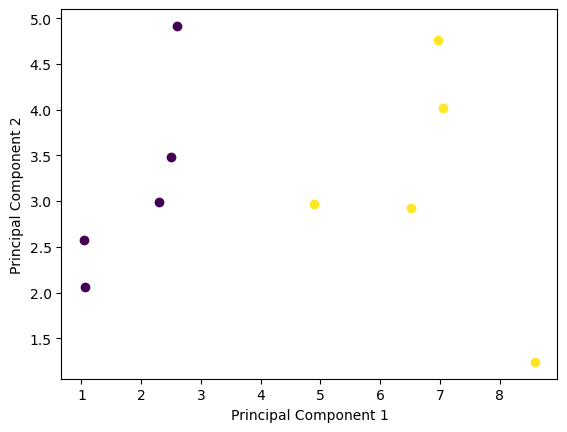

In [21]:
plot_in_2d(X, y)

### d. Evaluate the algorithm

In [22]:
n_folds = 5
learning_rate = 0.1
n_epoch = 100

In [23]:
scores = evaluate_algorithm(dataset, logistic_regression, n_folds, learning_rate, n_epoch)

### e. Results

Output the results

In [24]:
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores) / float(len(scores))))

Scores: [100.0, 100.0, 100.0, 100.0, 100.0]
Mean Accuracy: 100.000%


## Apply logistic regression algorithm on 'diabetes' dataset

Let start with the prediction and apply the functions we created above to predict if patient has diabetes or not.  To begin you'll preprocess and visualise the data, apply logistic regression and evaluate the algorithm.

### a. Preprocess and visualise data 

The first step is to extract the raw data from the dataset.

Now extract the class data from the dataset.

Now load and prepare data for prediction.

In [25]:
filename = 'pima-indians-diabetes.csv'

dataset = load_csv(filename)

x_data = extract_only_x_data(dataset)
y_data = extract_only_y_data(dataset)

X = np.array(x_data)
y = np.array(y_data)

Plot the graph to visualise the data.

768


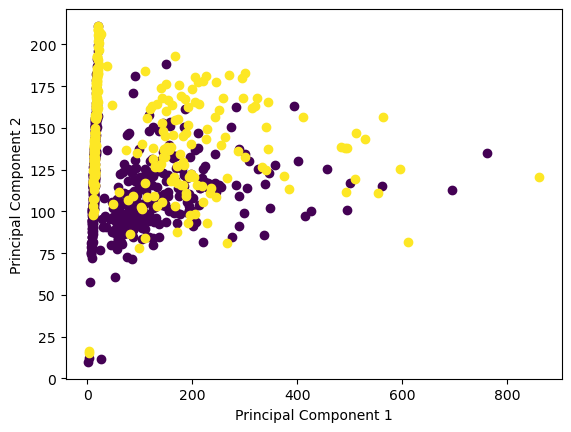

In [26]:
plot_in_2d(X, y)

Seed the random number generate to 1.

In [27]:
seed(1)

Normalise the dataset

In [28]:
for i in range(len(dataset[0])):
    string_column_to_float(dataset, i)

minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)

In [29]:
n_folds = 5
learning_rate = 0.1
n_epoch = 100

### b. Evaluate the algorithm

In [30]:
scores = evaluate_algorithm(dataset, logistic_regression, n_folds, learning_rate, n_epoch)

### c. Results

Output the results

In [31]:
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores) / float(len(scores))))

Scores: [62.091503267973856, 64.70588235294117, 64.70588235294117, 64.70588235294117, 69.28104575163398]
Mean Accuracy: 65.098%
